# EDA BASE 2: Microdatos de GEIH para Bogotá (2020-2021)

In [ ]:
!pip install -r req.txt

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [2]:
base2 = pd.read_excel('Bases de Datos/Mauricio Ospina - Instituto Distrital Turismo_Reto Observatorio de Turismo_Mauricio Ospina/2. Microdatos de GEIH para Bogotá (2020-2021).xls')
base2.shape

(61151, 67)

In [3]:
pd.options.display.max_columns = 100
base2.head(3)

,directorio,secuencia_p,orden,p6020,p6040,p6090,p6100,p6220,dpto,FacExp,area,p6440,p6460,p6400,p6424s1,p6424s2,p6424s3,p6480,p6500,p6510s1,p6585s1,p6585s1a1,p6585s2,p6585s2a1,p6585s3,p6585s3a1,p6585s4,p6585s4a1,p6750,p6800,p6870,p6880,p6920,p6930,p7020,p7040,p7130,p7140s1,p7140s2,p7140s3,p7150,oficio,p6430,rama4d,rama4dp8,rama2dp8,inglabo,p4030s1a1,año,mes,rama4d_r4,rama2d_r4,rama4d_d_r4,rama2d_d_r4,rama4dp8_r4,p6760,p3147s1,p3147s2,p3147s3,p3147s4,p3147s5,p3147s6,p3147s7,esc,rama,Sector,Subsector
0,5106876,1,1,Hombre,59,Si,Subsidiado? (eps-s),NaN,11,3486.816143,11,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550000.0,30.0,Trabaja solo,De puerta en puerta,No,NaN,Si,No,Si,No,Si,No,No,87.0,Trabajador por cuenta propia,NaN,NaN,NaN,550000.0,Bajo - bajo,2020,1,2592.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2592.0,No sector turismo,No subsector turismo
1,5106876,1,2,Mujer,53,Si,Subsidiado? (eps-s),NaN,11,3486.816143,11,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0,40.0,Trabaja solo,En otras viviendas,No,NaN,Si,No,No,NaN,NaN,NaN,NaN,54.0,Trabajador por cuenta propia,NaN,NaN,NaN,800000.0,Bajo - bajo,2020,1,8121.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8121.0,No sector turismo,No subsector turismo
2,5106876,1,3,Hombre,17,Si,Subsidiado? (eps-s),NaN,11,3486.816143,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo - bajo,2020,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No subsector turismo


In [4]:
base2 = base2.rename(columns={'p6020':'Genero','p6040':'Edad','p6090':'Afiliado_salud', 'p6100':'Regimen'
                              ,'p6220':'Nivel_escolaridad','dpto':'Departamento','FacExp':'Factor_expansion'
                              ,'p6440':'Tiene_contrato','p6460':'Contrato_indefinido','p6400':'Modalidad_contratacion'
                              ,'p6424s1':'Vacaciones','p6424s2':'Prima','p6424s3':'Cesantías','p6480':'Medio_busqueda_trabajo'
                              ,'p6500':'Ingresos','p6510s1':'Horas_extras','p6585s1':'Subsidio_alimentación'
                              ,'p6585s1a1':'Monto_Sub_alimentación','p6585s2':'SubsidioTransporte','p6585s2a1':'MontoSubtrans'
                              ,'p6585s3':'SubsidioFamiliar','p6585s3a1':'MontoSubsidioFamiliar','p6585s4':'SubsidioEducativo'
                              ,'p6585s4a1':'MontoSubEducativo','p6750':'Ingresos2','p6800':'HorasTrabajo','p6870':'NoPersonasEmpresa'
                              ,'p6880':'LugarTrabajo','p6920':'TrabajadorInformal','p6930':'FondoCotizacion','p7020':'ExperienciaLaboral'
                              ,'p7040':'SegundoTrabajo','p7130':'InconformeTrabajo','p7140s1':'InsatisfechoDesaprCompetencias'
                              ,'p7140s3':'InsatisfechoHorasLaborales','p7140s2':'InsatisfechoIngresos','p7150':'BuscandoEmpleo'
                              ,'p6430':'TipoEmpleado','inglabo':'IngresosLaborales','p4030s1a1':'Estrato','p6760':'MontoMesesRecibio'
                              ,'p3147s1':'Enfermo_Covid','p3147s2':'ProblemaAlimentosLimpieza','p3147s3':'COVIDPagoFacturasDeudas'
                              ,'p3147s4':'COVIDReduccionActividadIngresos','p3147s5':'COVID_ejercer_negocio'
                              ,'p3147s6':'COVIDSuspendieronSinRemuneracion','p3147s7':'COVIDPerdioTrabajoFuenteIngr'
                              ,'Rama 4D':'OcupadosPorSector','Sector':'SectorTurismo','Subsector':'SubsectorTurismo'})
base2.head(3)

,directorio,secuencia_p,orden,Genero,Edad,Afiliado_salud,Regimen,Nivel_escolaridad,Departamento,Factor_expansion,area,Tiene_contrato,Contrato_indefinido,Modalidad_contratacion,Vacaciones,Prima,Cesantías,Medio_busqueda_trabajo,Ingresos,Horas_extras,Subsidio_alimentación,Monto_Sub_alimentación,SubsidioTransporte,MontoSubtrans,SubsidioFamiliar,MontoSubsidioFamiliar,SubsidioEducativo,MontoSubEducativo,Ingresos2,HorasTrabajo,NoPersonasEmpresa,LugarTrabajo,TrabajadorInformal,FondoCotizacion,ExperienciaLaboral,SegundoTrabajo,InconformeTrabajo,InsatisfechoDesaprCompetencias,InsatisfechoIngresos,InsatisfechoHorasLaborales,BuscandoEmpleo,oficio,TipoEmpleado,rama4d,rama4dp8,rama2dp8,IngresosLaborales,Estrato,año,mes,rama4d_r4,rama2d_r4,rama4d_d_r4,rama2d_d_r4,rama4dp8_r4,MontoMesesRecibio,Enfermo_Covid,ProblemaAlimentosLimpieza,COVIDPagoFacturasDeudas,COVIDReduccionActividadIngresos,COVID_ejercer_negocio,COVIDSuspendieronSinRemuneracion,COVIDPerdioTrabajoFuenteIngr,esc,rama,SectorTurismo,SubsectorTurismo
0,5106876,1,1,Hombre,59,Si,Subsidiado? (eps-s),NaN,11,3486.816143,11,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550000.0,30.0,Trabaja solo,De puerta en puerta,No,NaN,Si,No,Si,No,Si,No,No,87.0,Trabajador por cuenta propia,NaN,NaN,NaN,550000.0,Bajo - bajo,2020,1,2592.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2592.0,No sector turismo,No subsector turismo
1,5106876,1,2,Mujer,53,Si,Subsidiado? (eps-s),NaN,11,3486.816143,11,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0,40.0,Trabaja solo,En otras viviendas,No,NaN,Si,No,No,NaN,NaN,NaN,NaN,54.0,Trabajador por cuenta propia,NaN,NaN,NaN,800000.0,Bajo - bajo,2020,1,8121.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8121.0,No sector turismo,No subsector turismo
2,5106876,1,3,Hombre,17,Si,Subsidiado? (eps-s),NaN,11,3486.816143,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo - bajo,2020,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No subsector turismo


In [5]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61151 entries, 0 to 61150
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   directorio                        61151 non-null  int64  
 1   secuencia_p                       61151 non-null  int64  
 2   orden                             61151 non-null  int64  
 3   Genero                            61151 non-null  object 
 4   Edad                              61151 non-null  int64  
 5   Afiliado_salud                    55500 non-null  object 
 6   Regimen                           49376 non-null  object 
 7   Nivel_escolaridad                 32130 non-null  object 
 8   Departamento                      61151 non-null  int64  
 9   Factor_expansion                  61151 non-null  float64
 10  area                              61151 non-null  int64  
 11  Tiene_contrato                    21911 non-null  object 
 12  Cont

In [6]:
base2.describe()

,directorio,secuencia_p,orden,Edad,Departamento,Factor_expansion,area,Ingresos,Horas_extras,Monto_Sub_alimentación,MontoSubtrans,MontoSubsidioFamiliar,MontoSubEducativo,Ingresos2,HorasTrabajo,oficio,rama4d,rama4dp8,rama2dp8,IngresosLaborales,año,mes,rama4d_r4,rama2d_r4,rama4d_d_r4,rama2d_d_r4,rama4dp8_r4,MontoMesesRecibio,Enfermo_Covid,ProblemaAlimentosLimpieza,COVIDPagoFacturasDeudas,COVIDReduccionActividadIngresos,COVID_ejercer_negocio,COVIDSuspendieronSinRemuneracion,COVIDPerdioTrabajoFuenteIngr,esc,rama
count,6.115100e+04,61151.000000,61151.000000,61151.000000,61151.0,61151.000000,61151.0,1.560100e+04,7.310000e+02,2.980000e+02,6.873000e+03,2.386000e+03,6.400000e+01,8.629000e+03,27403.000000,13976.000000,0.0,0.0,0.0,1.918000e+04,61151.000000,61151.000000,27403.000000,25286.000000,0.0,0.0,1512.000000,1990.000000,4629.0,4674.0,8191.0,11404.0,3302.0,1435.0,6674.0,8357.000000,27388.000000
mean,4.232951e+06,1.004857,2.361139,35.477130,11.0,3302.273781,11.0,1.680150e+06,1.654386e+05,1.496288e+05,1.029969e+05,5.287082e+04,4.483467e+05,1.107716e+06,46.957778,49.525472,NaN,NaN,NaN,1.542968e+06,2020.474023,6.412095,5828.650951,57.977656,NaN,NaN,7753.733466,1.042714,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.555462,5831.843216
std,2.228844e+06,0.099184,1.397677,21.249001,0.0,1093.604838,0.0,2.658030e+06,4.335611e+05,2.017431e+05,6.067441e+04,5.660610e+04,9.694366e+05,2.044558e+06,13.660197,29.519994,NaN,NaN,NaN,2.568926e+06,0.499329,3.382547,2374.183897,23.787252,NaN,NaN,830.188539,0.523634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.110057,2370.911003
min,4.300000e+01,1.000000,1.000000,0.000000,11.0,406.664710,11.0,0.000000e+00,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,0.000000e+00,2020.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,112.000000
25%,5.121215e+06,1.000000,1.000000,19.000000,11.0,2670.810908,11.0,8.778030e+05,2.750000e+04,5.000000e+04,1.028540e+05,3.500000e+04,3.300000e+04,3.000000e+05,40.000000,30.000000,NaN,NaN,NaN,7.800000e+05,2020.000000,4.000000,4631.000000,46.000000,NaN,NaN,7810.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.000000,4631.000000
50%,5.309023e+06,1.000000,2.000000,33.000000,11.0,3218.187392,11.0,1.000000e+06,1.000000e+05,1.000000e+05,1.060000e+05,3.850000e+04,6.000000e+04,7.000000e+05,48.000000,45.000000,NaN,NaN,NaN,9.085260e+05,2020.000000,6.000000,5511.000000,53.000000,NaN,NaN,7810.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.000000,5511.000000
75%,5.475950e+06,1.000000,3.000000,52.000000,11.0,3790.624617,11.0,1.600000e+06,2.000000e+05,2.000000e+05,1.064540e+05,6.800000e+04,2.112500e+05,1.200000e+06,50.000000,77.000000,NaN,NaN,NaN,1.500000e+06,2021.000000,9.000000,8220.000000,82.000000,NaN,NaN,8010.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,13.000000,8220.000000
max,6.062991e+06,10.000000,14.000000,107.000000,11.0,12428.420781,11.0,1.000000e+08,1.000000e+07,2.000000e+06,2.000000e+06,1.200000e+06,5.000000e+06,1.000000e+08,130.000000,99.000000,NaN,NaN,NaN,1.000000e+08,2021.000000,12.000000,9900.000000,99.000000,NaN,NaN,9603.000000,12.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,26.000000,9900.000000


In [7]:
base2[['Edad','Ingresos','Monto_Sub_alimentación','MontoSubtrans','MontoSubsidioFamiliar','MontoSubEducativo'
       ,'IngresosLaborales']].describe()

,Edad,Ingresos,Monto_Sub_alimentación,MontoSubtrans,MontoSubsidioFamiliar,MontoSubEducativo,IngresosLaborales
count,61151.000000,1.560100e+04,2.980000e+02,6.873000e+03,2.386000e+03,6.400000e+01,1.918000e+04
mean,35.477130,1.680150e+06,1.496288e+05,1.029969e+05,5.287082e+04,4.483467e+05,1.542968e+06
std,21.249001,2.658030e+06,2.017431e+05,6.067441e+04,5.660610e+04,9.694366e+05,2.568926e+06
min,0.000000,0.000000e+00,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,0.000000e+00
25%,19.000000,8.778030e+05,5.000000e+04,1.028540e+05,3.500000e+04,3.300000e+04,7.800000e+05
50%,33.000000,1.000000e+06,1.000000e+05,1.060000e+05,3.850000e+04,6.000000e+04,9.085260e+05
75%,52.000000,1.600000e+06,2.000000e+05,1.064540e+05,6.800000e+04,2.112500e+05,1.500000e+06
max,107.000000,1.000000e+08,2.000000e+06,2.000000e+06,1.200000e+06,5.000000e+06,1.000000e+08


In [8]:
base2[['Genero','Afiliado_salud','Regimen','Nivel_escolaridad','Tiene_contrato','Contrato_indefinido','Modalidad_contratacion'
       ,'Vacaciones','Prima','Cesantías','Medio_busqueda_trabajo','Subsidio_alimentación','SubsidioTransporte','SubsidioFamiliar'
       ,'SubsidioEducativo','NoPersonasEmpresa','LugarTrabajo','TrabajadorInformal','FondoCotizacion','ExperienciaLaboral'
       ,'SegundoTrabajo','InconformeTrabajo','InsatisfechoDesaprCompetencias','InsatisfechoIngresos','InsatisfechoHorasLaborales'
       ,'BuscandoEmpleo','TipoEmpleado','Estrato','SectorTurismo','SubsectorTurismo']].describe()

,Genero,Afiliado_salud,Regimen,Nivel_escolaridad,Tiene_contrato,Contrato_indefinido,Modalidad_contratacion,Vacaciones,Prima,Cesantías,Medio_busqueda_trabajo,Subsidio_alimentación,SubsidioTransporte,SubsidioFamiliar,SubsidioEducativo,NoPersonasEmpresa,LugarTrabajo,TrabajadorInformal,FondoCotizacion,ExperienciaLaboral,SegundoTrabajo,InconformeTrabajo,InsatisfechoDesaprCompetencias,InsatisfechoIngresos,InsatisfechoHorasLaborales,BuscandoEmpleo,TipoEmpleado,Estrato,SectorTurismo,SubsectorTurismo
count,61151,55500,49376,32130,21911,11598,15105,15105,15105,15105,13603,13603,13603,13603,13603,25286,21911,25272,14538,21911,21911,21911,4949,4949,4949,4949,27403,46867,27388,61151
unique,2,3,4,6,2,3,3,2,2,2,8,3,3,3,3,9,11,3,4,2,2,2,2,2,2,2,9,7,10,31
top,Mujer,Si,Contributivo (eps)?,Bachiller,Si,A termino indefinido,Si,Si,No,Si,"Pidio ayuda a familiares, amigos, colegas",No,Si,No,No,101 o mas personas,"Local fijo, oficina, f�brica, etc.",Si,Fondo privado?,Si,No,No,Si,Si,No,No,Obrero o empleado de empresa particular,Bajo,No sector turismo,No subsector turismo
freq,32099,49376,36895,17312,15105,7984,13589,9952,13786,10281,8180,13296,6873,11194,13525,7822,13996,14538,9364,18316,21450,16962,4126,4850,3619,2749,15053,20413,24657,58374


<AxesSubplot:ylabel='Nivel_escolaridad'>

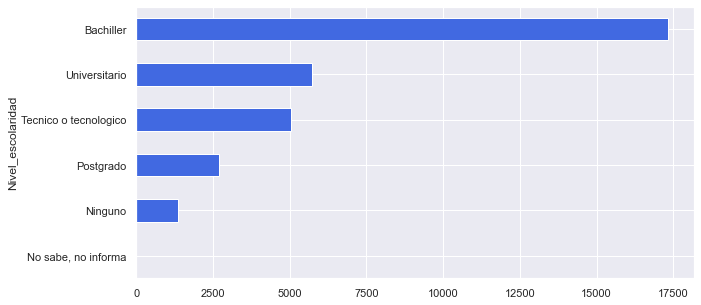

In [9]:
base2.groupby(['Nivel_escolaridad'])['Nivel_escolaridad'].count().sort_values(ascending=True).tail(10).plot.barh(
                                                              title=False,
                                                                color="royalblue",
                                                                figsize= (10,5))

<AxesSubplot:ylabel='Afiliado_salud'>

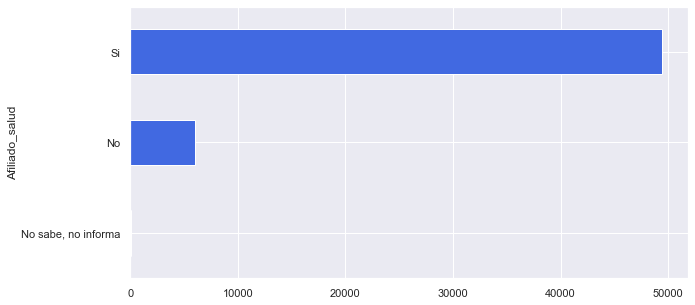

In [10]:
base2.groupby(['Afiliado_salud'])['Afiliado_salud'].count().sort_values(ascending=True).tail(10).plot.barh(
                                                              title=False,
                                                                color="royalblue",
                                                                figsize= (10,5))

<AxesSubplot:ylabel='Regimen'>

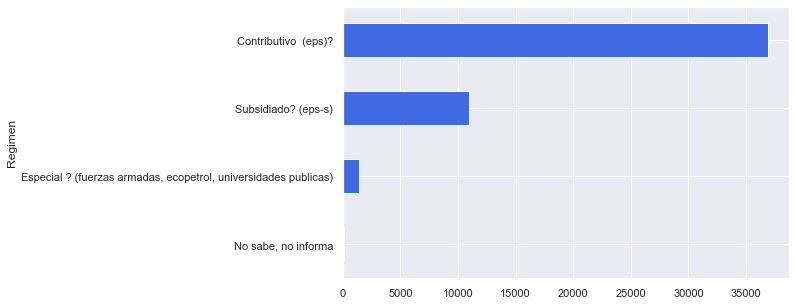

In [11]:
base2.groupby(['Regimen'])['Regimen'].count().sort_values(ascending=True).tail(10).plot.barh(
                                                              title=False,
                                                                color="royalblue",
                                                                figsize= (8,5))

<AxesSubplot:ylabel='Estrato'>

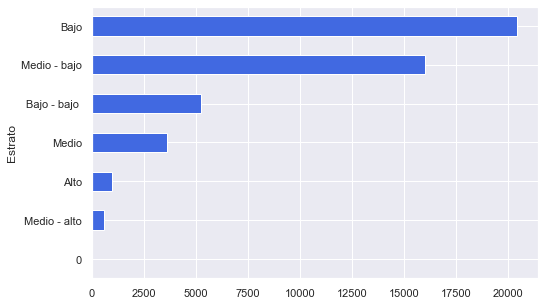

In [12]:
base2.groupby(['Estrato'])['Estrato'].count().sort_values(ascending=True).tail(10).plot.barh(
                                                              title=False,
                                                                color="royalblue",
                                                                figsize= (8,5))

<AxesSubplot:ylabel='Medio_busqueda_trabajo'>

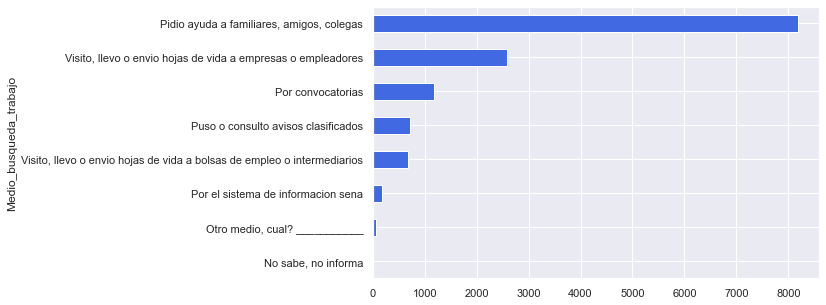

In [13]:
base2.groupby(['Medio_busqueda_trabajo'])['Medio_busqueda_trabajo'].count().sort_values(ascending=True).tail(10).plot.barh(
                                                              title=False,
                                                                color="royalblue",
                                                                figsize= (8,5))